Importing the Necessary Libraries

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import keras
import keras_preprocessing
from keras.models import Model
from keras.layers import LSTM, Activation, Dense, Dropout, Input, Embedding
from keras.optimizers import RMSprop
from keras.preprocessing.text import Tokenizer
from keras.preprocessing import sequence
from keras.utils import pad_sequences
from keras.utils import to_categorical
from keras.callbacks import EarlyStopping
from keras_preprocessing.sequence import pad_sequences
import tensorflow as tf

tf.keras.utils.pad_sequences(
    sequences,
    maxlen=None,
    dtype='int32',
    padding='pre',
    truncating='pre',
    value=0.0
)

%matplotlib inline

Mounting the drive

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df = pd.read_csv('/content/drive/MyDrive/I BM/Assignments /4/spam.csv',delimiter=',',encoding='latin-1')
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [4]:
df.drop(['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'],axis=1,inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   v1      5572 non-null   object
 1   v2      5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Number of ham and spam messages')

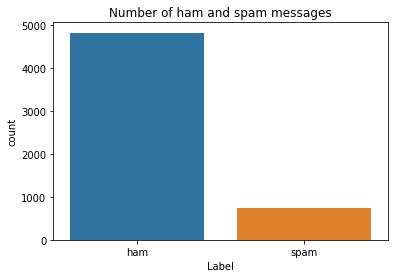

In [5]:
sns.countplot(df.v1)
plt.xlabel('Label')
plt.title('Number of ham and spam messages')

In [6]:
X = df.v2
Y = df.v1
le = LabelEncoder()
Y = le.fit_transform(Y)
Y = Y.reshape(-1,1)

In [7]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.15)

In [43]:
max_words = 1000
max_len = 150
tok = Tokenizer(num_words=max_words)
tok.fit_on_texts(X_train)
sequences = tok.texts_to_sequences(X_train)
print(sequences)
seq_mat = keras.utils.pad_sequences(sequences, maxlen=max_len)
tf.keras.utils.pad_sequences(
    sequences,
    maxlen=None,
    dtype='int32',
    padding='pre',
    truncating='pre',
    value=0.0
)


[[57, 176, 368, 149, 107, 284], [418, 246, 12, 108], [360, 187, 104, 27, 916, 702, 277, 92, 32, 172, 2, 21, 792, 340, 240], [114, 851, 3, 369, 341, 19, 640, 467, 247, 5, 7, 31, 5, 3, 146, 10, 4, 7, 78, 146, 3, 76], [81, 6, 608, 1, 138, 530, 554, 5, 173, 1, 142, 2, 395, 12, 14], [40, 9, 3, 13, 640, 531, 83, 192, 25, 105, 8, 672, 24, 96, 54, 19, 3, 22, 201, 16, 4, 122, 112, 917], [71, 4, 747, 334, 43, 4, 555, 532, 703, 36, 178, 990, 20, 15, 4, 918, 919, 46, 22, 5, 216, 73, 919, 2], [132, 24, 63, 4, 347, 22, 3, 14, 2, 34, 12, 5, 216], [52], [36, 6, 162, 33, 920, 222, 9, 33, 201, 18, 4, 347, 18, 166, 52, 47, 73, 82, 33, 145, 455], [43, 272, 27, 991, 556, 165, 641, 13, 198, 501, 21, 49, 440, 25, 2, 577, 52], [335, 116, 163, 68], [133, 22, 3, 1, 202, 852, 15, 3, 54, 1, 77, 3], [139, 482, 108, 269, 9, 25, 38, 578, 992, 326, 6, 212, 46, 6, 162, 170, 24, 578, 483, 6, 212, 46, 6, 171], [100, 502, 557, 50, 673, 456, 107, 44, 20], [5, 41, 42, 455, 19, 1, 503, 4, 300, 278, 748, 5, 484, 579, 66, 12,

array([[  0,   0,   0, ..., 149, 107, 284],
       [  0,   0,   0, ..., 246,  12, 108],
       [  0,   0,   0, ..., 792, 340, 240],
       ...,
       [  0,   0,   0, ..., 250,  61, 794],
       [  0,   0,   0, ...,  60,   4, 294],
       [  0,   0,   0, ..., 810, 693, 492]], dtype=int32)

In [35]:
def RNN():
    inputs = Input(name='inputs',shape=[max_len])
    layer = Embedding(max_words,50,input_length=max_len)(inputs)
    layer = LSTM(64)(layer)
    layer = Dense(256,name='FC1')(layer)
    layer = Activation('relu')(layer)
    layer = Dropout(0.5)(layer)
    layer = Dense(1,name='out_layer')(layer)
    layer = Activation('sigmoid')(layer)
    model = Model(inputs=inputs,outputs=layer)
    return model

In [36]:
model = RNN()
model.summary()
model.compile(loss='binary_crossentropy',optimizer=RMSprop(),metrics=['accuracy'])

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inputs (InputLayer)         [(None, 150)]             0         
                                                                 
 embedding_1 (Embedding)     (None, 150, 50)           50000     
                                                                 
 lstm_1 (LSTM)               (None, 64)                29440     
                                                                 
 FC1 (Dense)                 (None, 256)               16640     
                                                                 
 activation_2 (Activation)   (None, 256)               0         
                                                                 
 dropout_1 (Dropout)         (None, 256)               0         
                                                                 
 out_layer (Dense)           (None, 1)                 257 

In [23]:
model.fit(seq_mat,Y_train,batch_size=128,epochs=10,
          validation_split=0.2,callbacks=[EarlyStopping(monitor='val_loss',min_delta=0.0001)])

Epoch 1/10
30/30 [==============================] - 15s 403ms/step - loss: 0.3338 - accuracy: 0.8688 - val_loss: 0.1370 - val_accuracy: 0.9525
Epoch 2/10
30/30 [==============================] - 14s 476ms/step - loss: 0.0836 - accuracy: 0.9802 - val_loss: 0.0485 - val_accuracy: 0.9852


In [48]:
test_sequences = tok.texts_to_sequences(X_test)
print(test_sequences)
test_sequences_matrix = pad_sequences(test_sequences,maxlen=max_len)

[[5, 758, 43, 992, 9, 118, 15, 123, 15, 151, 5, 144, 14, 560, 6, 36, 166, 992, 8, 191, 6, 292], [139, 81, 6, 161], [116, 298, 217, 136, 419, 1, 208, 337, 14], [60, 8, 13, 411, 27, 196], [83, 95, 90, 1, 421, 62, 2, 341, 1, 16, 558], [70, 9, 68, 3, 17, 7, 162, 129], [33, 356, 4, 685, 7, 202, 172, 4, 443, 191, 329, 73, 2, 340], [162, 159, 299], [248, 4, 332, 15, 61, 457, 9, 55, 466, 365, 288, 1, 211, 86, 14], [274, 1, 103, 1, 120, 136], [491, 180, 1, 171, 3, 157, 3, 54, 211, 3, 184, 10, 69, 3, 108, 221, 13, 541, 1, 77, 3, 1, 67, 3, 1, 925, 3], [91, 4, 735, 7, 69, 14, 2, 10], [171, 254, 77, 254, 67, 254, 65, 254], [6, 36, 13, 757, 20], [3, 175, 445, 34, 812, 110, 110, 110, 110, 110], [115, 703, 2, 126, 40, 879, 383, 28, 3, 106, 48, 2, 561, 148, 145, 259, 194, 960, 321, 428], [195, 6, 38, 161, 11, 527, 28, 123, 156, 84, 44, 43, 215, 5, 402], [478, 901, 64, 735, 15, 73, 735, 2, 100, 171, 52, 58, 191, 329, 4, 43, 130, 611, 141, 259, 194, 733, 329], [618, 115, 769, 115, 6, 81, 25, 24, 1, 30, 4

In [49]:
accr = model.evaluate(test_sequences_matrix,Y_test)

27/27 [==============================] - 1s 36ms/step - loss: 0.6948 - accuracy: 0.2321


In [50]:
print('Test set\n  Loss: {:0.3f}\n  Accuracy: {:0.3f}'.format(accr[0],accr[1]))

Test set
  Loss: 0.695
  Accuracy: 0.232
